# Exploratory Data Analysis (EDA)

## Project: Market Sequence Predictor

This notebook explores the structure and statistical properties of the training dataset used
for sequence-based market prediction.

**Objectives:**
- Understand the sequence structure (`seq_ix`)
- Inspect feature distributions
- Identify temporal behavior
- Detect data quality issues before modeling



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [ ]:
DATA_PATH = "./datasets/train.parquet" 

df = pd.read_parquet(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (517000, 35)


,seq_ix,step_in_seq,need_prediction,0,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,-0.080082,1.324564,0.637730,-1.091486,-0.859104,1.291364,-1.046394,...,0.876881,-1.425938,-0.104571,1.253508,-1.155514,-0.907224,1.361777,0.602751,1.265182,-0.495940
1,0,1,0,-1.243274,0.398425,-1.810485,-0.427042,0.303473,0.304587,-0.392796,...,0.669286,-0.720985,-1.144171,0.724269,-1.259564,0.181201,0.529757,-0.076843,1.111895,-1.171435
2,0,2,0,-0.124680,1.225580,0.139482,-0.967710,-0.769101,1.208697,-1.218701,...,0.742988,-1.381406,0.043121,1.205969,-1.062414,-0.739191,1.266046,0.856712,1.205016,-0.417057
3,0,3,0,-1.264455,0.494485,-1.041663,-0.587907,0.203893,0.437923,-0.479116,...,0.808542,-0.777047,-1.163911,0.801497,-1.280313,-0.090955,0.636906,-0.213926,1.121746,-1.364489
4,0,4,0,-0.882663,-0.223168,-1.229349,0.029471,0.459377,-0.232340,0.113789,...,0.286553,-0.114436,-0.730509,0.301325,-0.782454,0.486104,-0.172012,-0.016936,0.674722,-0.740237


## Dataset Structure

The dataset consists of multiple independent sequences identified by `seq_ix`.
Each sequence represents a temporal market trajectory.

The first columns contain identifiers, while remaining columns are numeric features.



In [8]:
df.info()

missing = df.isna().sum()
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517000 entries, 0 to 516999
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   seq_ix           517000 non-null  int64  
 1   step_in_seq      517000 non-null  int64  
 2   need_prediction  517000 non-null  int64  
 3   0                517000 non-null  float64
 4   1                517000 non-null  float64
 5   2                517000 non-null  float64
 6   3                517000 non-null  float64
 7   4                517000 non-null  float64
 8   5                517000 non-null  float64
 9   6                517000 non-null  float64
 10  7                517000 non-null  float64
 11  8                517000 non-null  float64
 12  9                517000 non-null  float64
 13  10               517000 non-null  float64
 14  11               517000 non-null  float64
 15  12               517000 non-null  float64
 16  13               517000 non-null  floa

Series([], dtype: int64)

## Sequence Analysis

Understanding the number and length of sequences is critical to avoid data leakage
and to correctly split training and validation sets.


Number of sequences: 517
Min length: 1000
Max length: 1000
Mean length: 1000.0


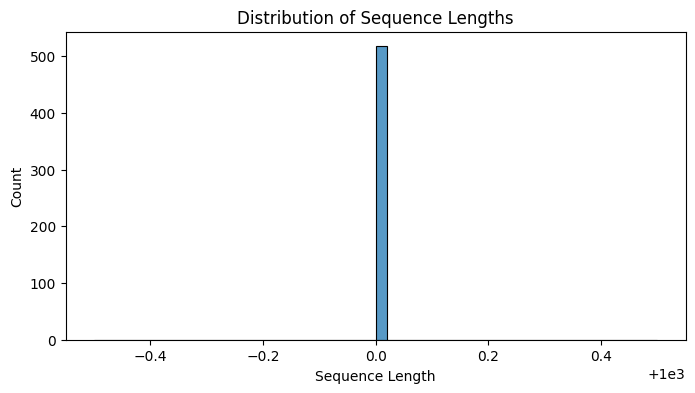

In [9]:
seq_lengths = df.groupby("seq_ix").size()

print("Number of sequences:", seq_lengths.shape[0])
print("Min length:", seq_lengths.min())
print("Max length:", seq_lengths.max())
print("Mean length:", seq_lengths.mean())

plt.figure(figsize=(8,4))
sns.histplot(seq_lengths, bins=50)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.show()


## Feature Distributions

We inspect feature distributions to understand scale, skewness,
and whether normalization is necessary.


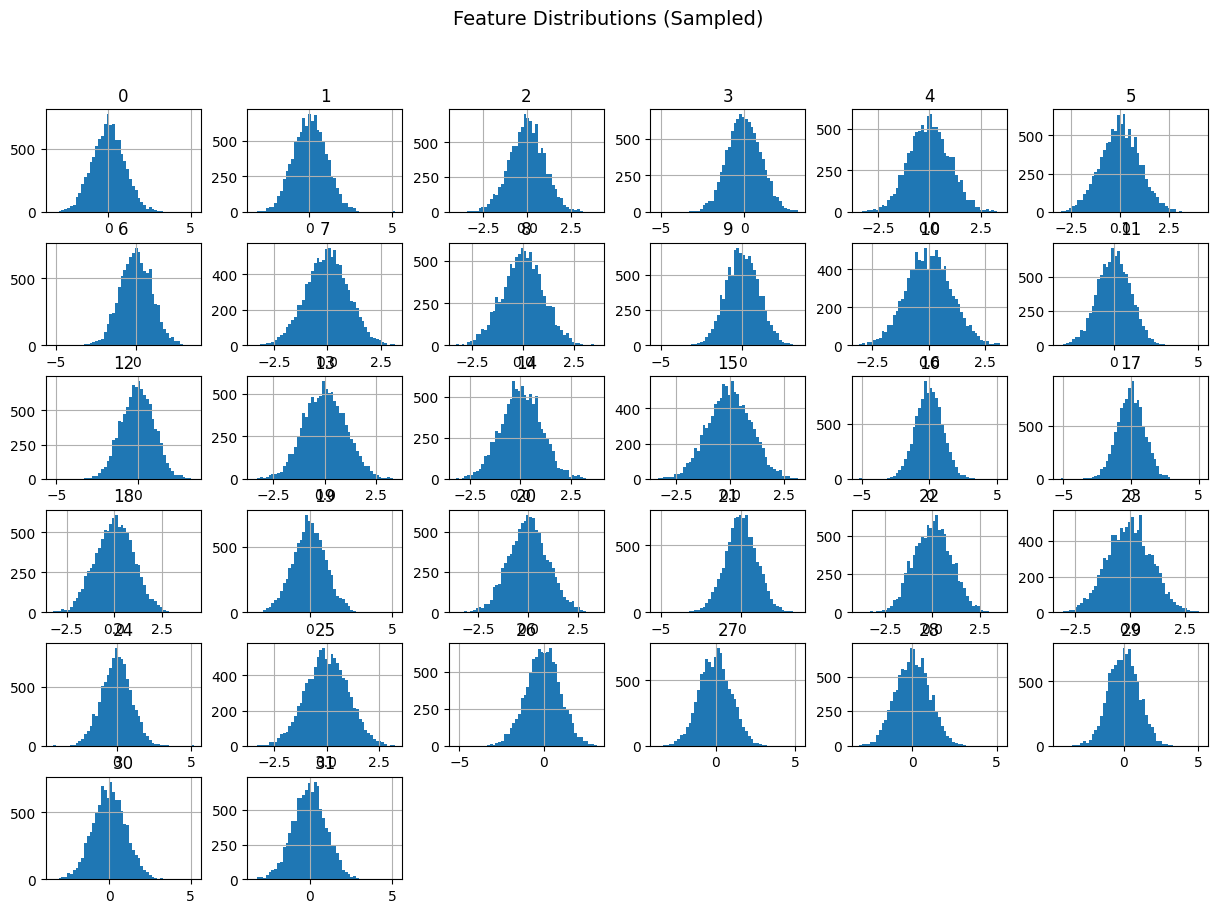

In [10]:
feature_cols = df.columns[3:]

df[feature_cols].sample(10000).hist(
    figsize=(15, 10),
    bins=50
)
plt.suptitle("Feature Distributions (Sampled)", fontsize=14)
plt.show()


## Temporal Behavior Within a Sequence

We visualize how features evolve across time within a single sequence.


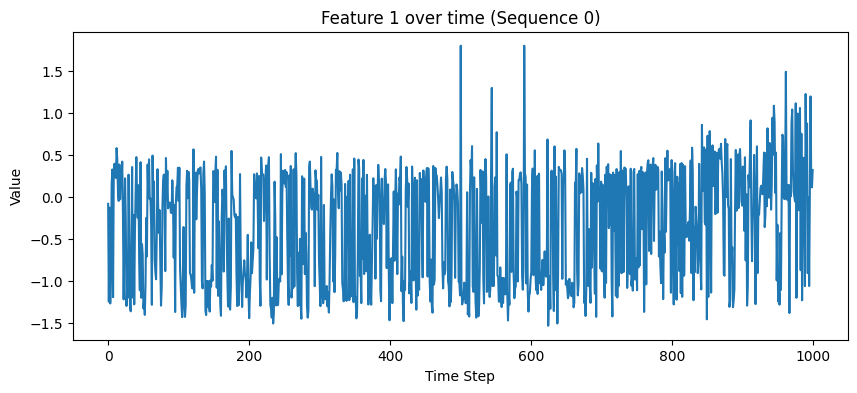

In [11]:
example_seq = df["seq_ix"].iloc[0]
seq_df = df[df["seq_ix"] == example_seq]

plt.figure(figsize=(10,4))
plt.plot(seq_df.iloc[:, 3].values)
plt.title(f"Feature 1 over time (Sequence {example_seq})")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()


## Key Findings

- The dataset consists of multiple independent time series sequences.
- Sequence lengths vary but are sufficiently long for window-based modeling.
- Feature distributions show scale differences, motivating normalization.
- Temporal patterns justify the use of recurrent neural networks (GRU).

This analysis informed model design choices such as:
- Sliding window training
- Sequence-aware data splitting
- Recurrent neural architecture
